In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [2]:
def evogrid(X,T,prob):
    start= np.zeros(X)
    infect=np.random.randint(0,X,3)
    counterI=3
    casecounter=[]
    dailycounter=[]
    for i in infect:
        start[i]=1
    for i in range(T):
        dcount=0
        for j in range(counterI):
            if np.random.rand()> prob:
                pos=np.random.randint(0,X)
                if start[pos]==0:
                    counterI+=1
                    start[pos]=1
                    dcount+=1
        casecounter.append(counterI)
        dailycounter.append(dcount)
    return(np.asarray(casecounter),np.asarray(dailycounter))

def simplederivative(X,Y):
    der=[]
    for i in range(len(X)-1):
        der.append((Y[i+1]-Y[i])/(X[i+1]-X[i]))
    return np.asarray(der)

        

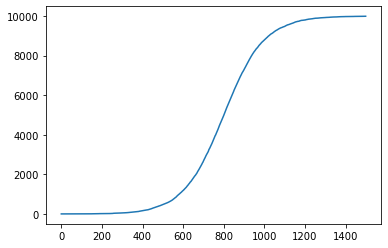

In [3]:
plt.plot(range(len(evogrid(10000,1500,0.99)[0])),evogrid(10000,1500,0.99)[0])


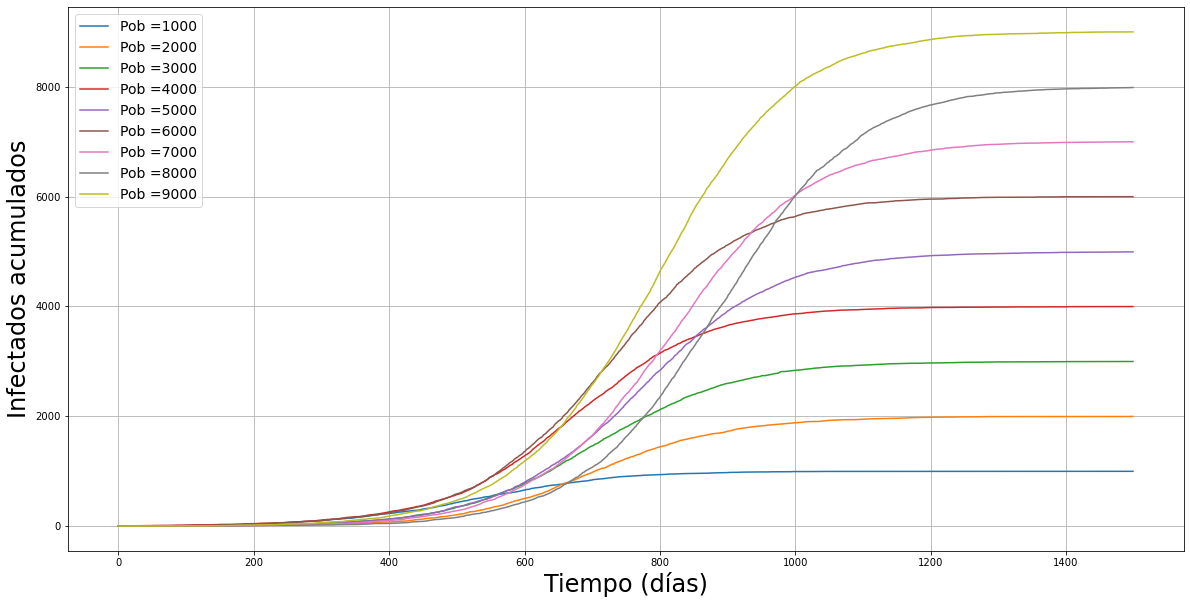

In [4]:
Ti=1500
result=evogrid(1000,Ti,0.99) ; ex=np.asarray(range(Ti))

plt.figure(figsize=(20,10))
for i in range(1000,10000,1000):
    plt.plot(ex,evogrid(i,1500,0.99)[0],label="Pob =" + str(i))
plt.grid()
plt.xlabel("Tiempo (días)",fontsize=24)
plt.ylabel("Infectados acumulados",fontsize=24)
plt.legend(fontsize=14)

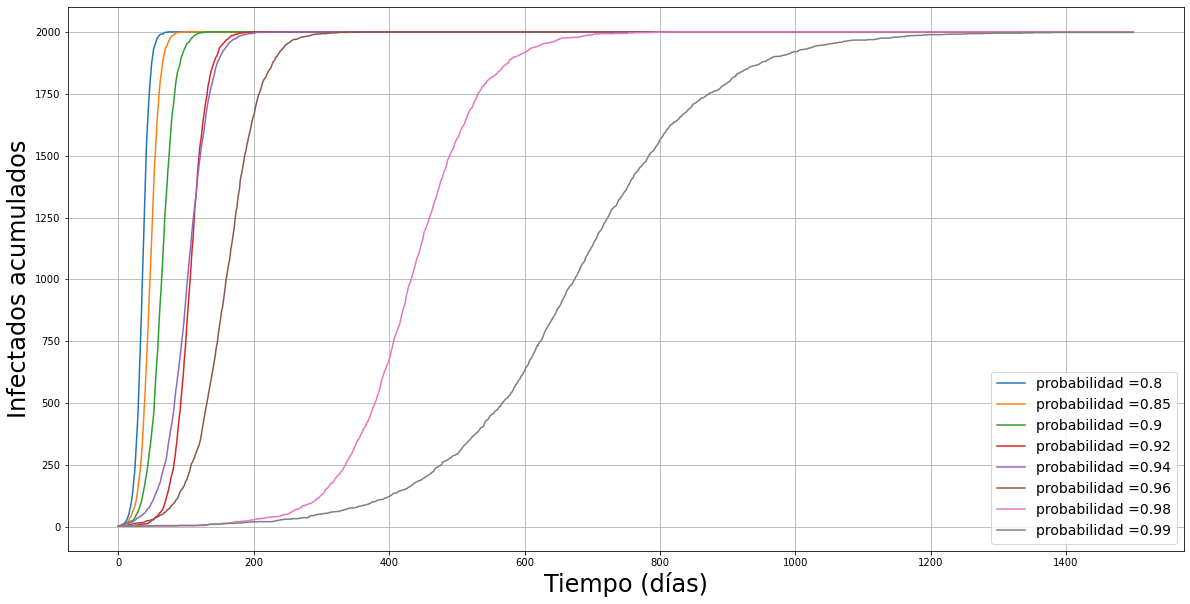

In [6]:
Ti=1500
probs=[0.8,0.85,0.9,0.92,0.94,0.96,0.98,0.99]
plt.figure(figsize=(20,10))
for i in probs:
    plt.plot(ex,evogrid(2000,1500,i)[0],label="probabilidad =" + str(i))
plt.grid()
plt.xlabel("Tiempo (días)",fontsize=24)
plt.ylabel("Infectados acumulados",fontsize=24)
plt.legend(fontsize=14)

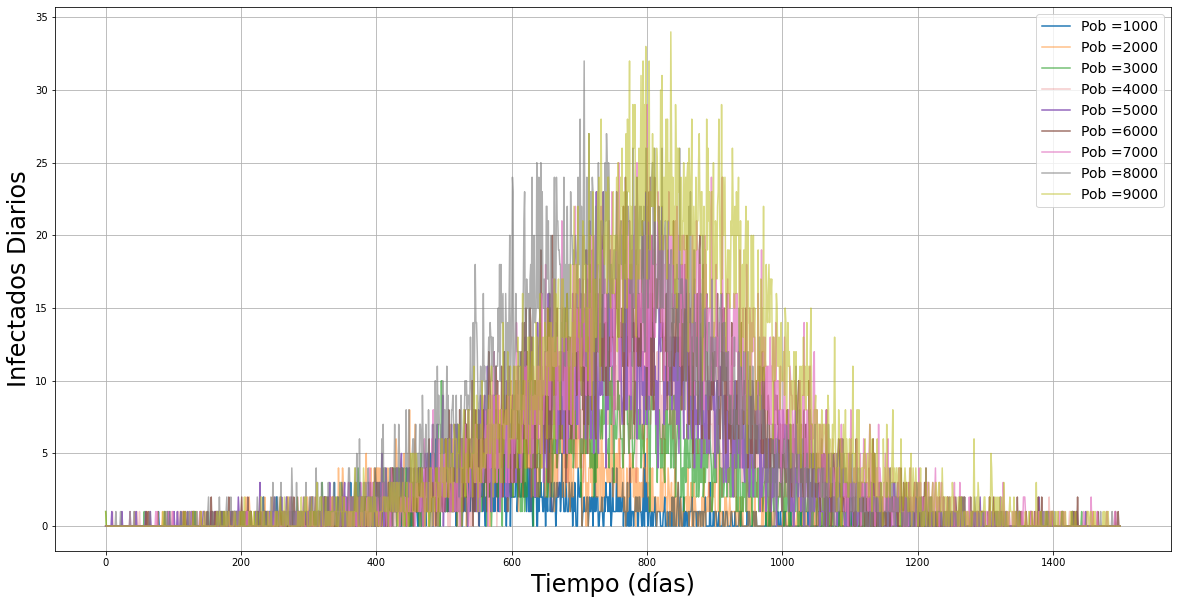

In [14]:
Ti=1500
result=evogrid(1000,Ti,0.99) ; ex=np.asarray(range(Ti))

plt.figure(figsize=(20,10))
for i in range(1000,10000,1000):
    plt.plot(ex,evogrid(i,1500,0.99)[1],"-",label="Pob =" + str(i),alpha=5000/i)
plt.grid()
plt.xlabel("Tiempo (días)",fontsize=24)
plt.ylabel("Infectados Diarios",fontsize=24)
plt.legend(fontsize=14)

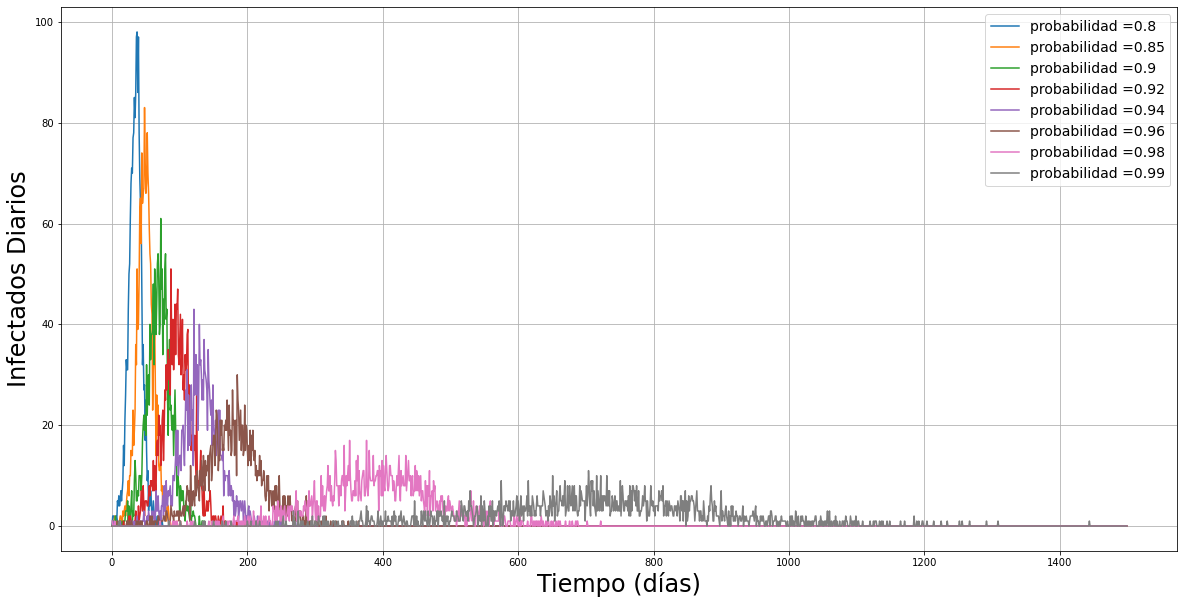

In [10]:
Ti=1500
probs=[0.8,0.85,0.9,0.92,0.94,0.96,0.98,0.99]
plt.figure(figsize=(20,10))
for i in probs:
    plt.plot(ex,evogrid(2000,1500,i)[1],label="probabilidad =" + str(i))
plt.grid()
plt.xlabel("Tiempo (días)",fontsize=24)
plt.ylabel("Infectados Diarios",fontsize=24)
plt.legend(fontsize=14)

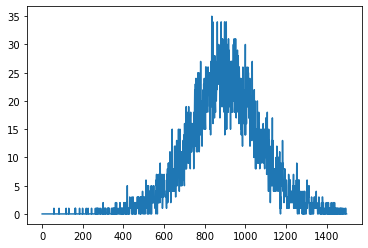

In [189]:
Ti=1500
result=evogrid(10000,Ti) ; ex=np.asarray(range(Ti))
plt.plot(ex[0:len(ex)-1],simplederivative(ex,result[0]))


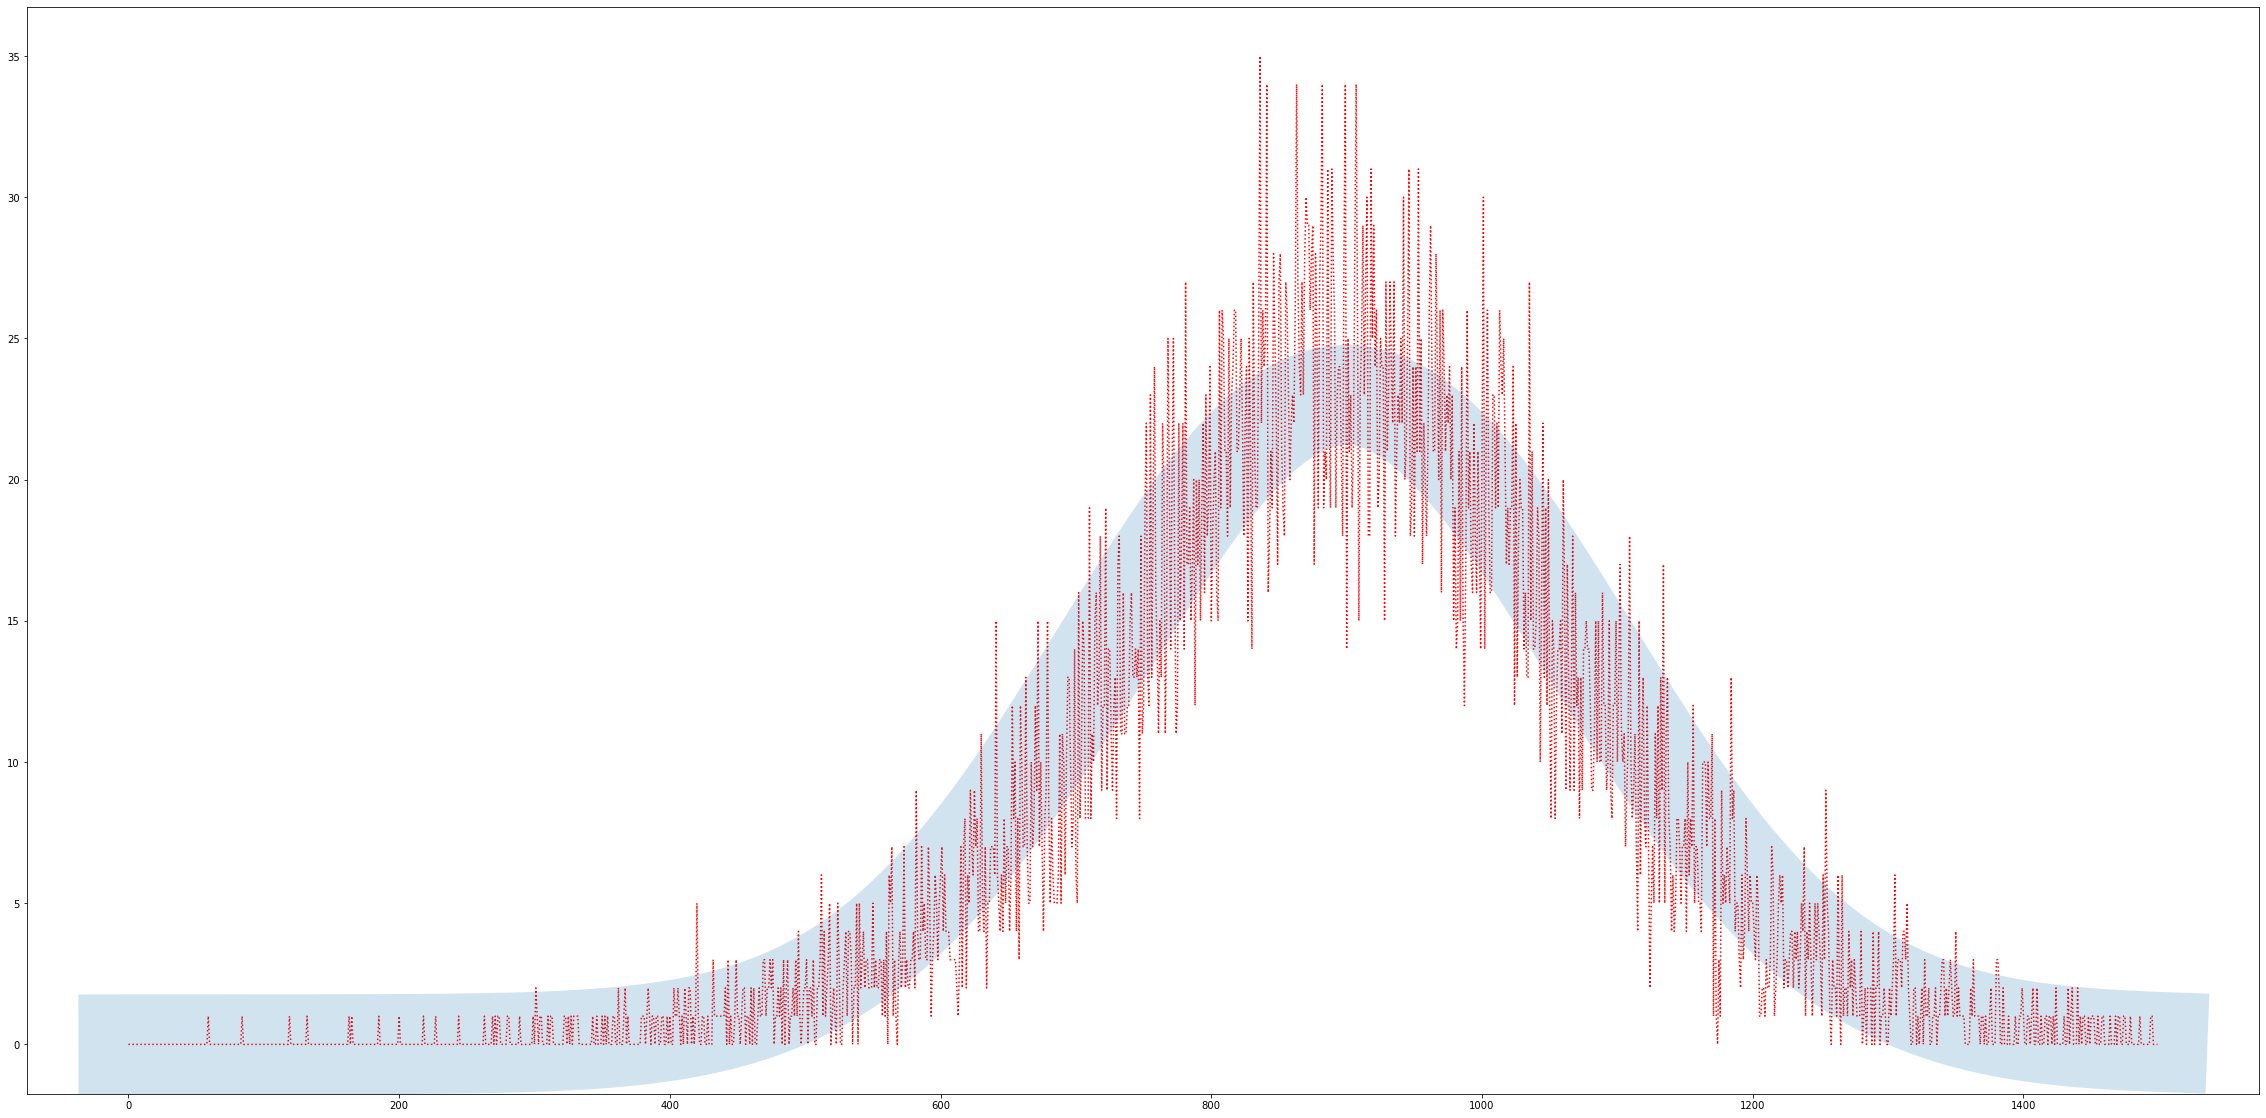

In [214]:
plt.figure(figsize=(40,20))
plt.plot(ex,result[1],'r:')
plt.plot(ex,gaus(ex,23,900,180),linewidth=100,alpha=0.2) 


In [228]:
def gaus(x,a,x0,sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [229]:
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

mean=np.sum(ex*result[1])/len(ex)

sigma=np.sum(result[1]*(ex-mean)**2)/len(ex)

popt,pcov = curve_fit(gaus,ex,result[1])


In [230]:
print(np.sum(ex*result[1]/np.max(result[1]))/len(ex))

170.8426857142857


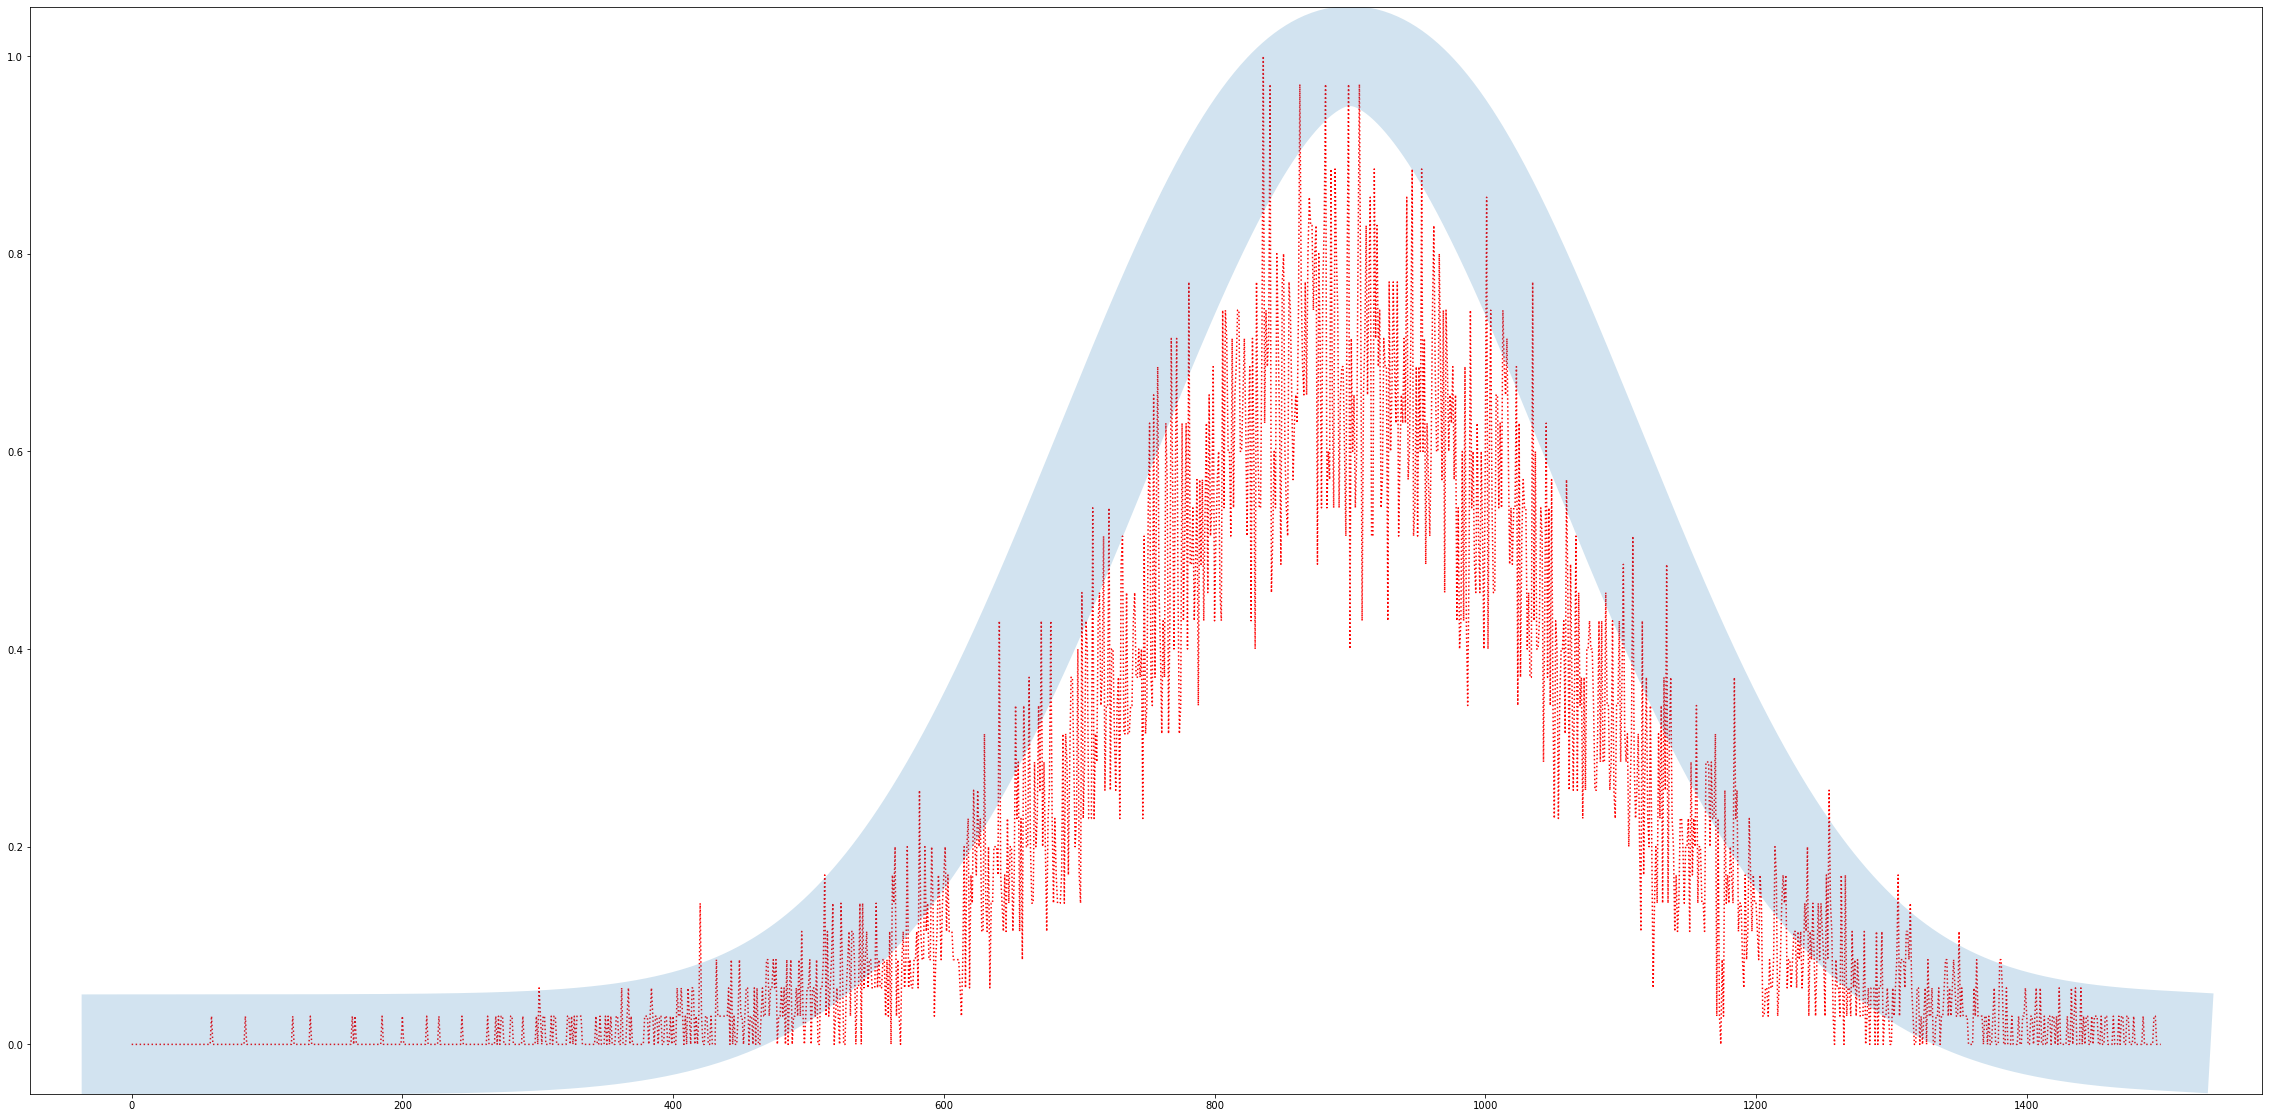

In [231]:
plt.figure(figsize=(40,20))
plt.plot(ex,result[1]/np.max(result[1]),'r:')
plt.plot(ex,gaus(ex,1,900,180),linewidth=100,alpha=0.2) 